# Phishing URL Detection using Machine Learning  
## BITS Pilani – Machine Learning Assignment 2

### Problem Statement
Phishing websites are fraudulent websites designed to steal sensitive information
such as login credentials, banking details, and personal data. The objective of this
project is to build machine learning classification models that can accurately
predict whether a given URL is **phishing** or **legitimate** based on extracted
URL-based features.

### Dataset
- **Name:** PhiUSIIL Phishing URL Dataset
- **Source:** UCI Machine Learning Repository
- **Type:** Binary Classification
- **Instances:** 200,000+
- **Features:** 50+

### Approach
We follow a step-by-step machine learning pipeline:
1. Dataset loading and inspection
2. EDA
3a. Feature–target separation
3b. Train–test split
4. Model building and evaluation
5. Comparison of multiple classifiers

### Importing Libraries

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix, classification_report
)
# Display settings
pd.set_option("display.max_columns", None)

print("Libraries imported successfully")

Libraries imported successfully


### Step 1: Data set loading and inspection 

In [78]:
def load_phishing_data():
    """
    Load the  Phishing URL Dataset (UCI ML Repository).

    download directly from the UCI repository.

    Official UCI dataset page:
    https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset
    """
    # Direct download from UCI (ZIP file)
    url = "https://archive.ics.uci.edu/static/public/967/phiusiil+phishing+url+dataset.zip"
    try:
        print(f"Attempting to download dataset from: {url}")
        df = pd.read_csv(url, compression="zip")
        print("Successfully downloaded dataset from UCI!")
    except Exception as e:
        print(f"Could not download dataset automatically: {e}")
        print("\nPlease download the dataset manually from:")
        print("https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset")
        print("\nExtract the CSV file and load it using:")
        print("load_phiusiil_phishing_data('path/to/your/local/file.csv')")
        return None
    return df


In [79]:
df = load_phishing_data()
print("Dataset shape:", df.shape)
df.head()

Attempting to download dataset from: https://archive.ics.uci.edu/static/public/967/phiusiil+phishing+url+dataset.zip
Successfully downloaded dataset from UCI!
Dataset shape: (235795, 56)


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.0,0,0,0,1,0.032,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.0,0,0,0,2,0.087,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.0,0,0,0,2,0.069,1,467,682,1,voice fm southampton,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,6356,26824,1,home page: seminars in fetal and neonatal medi...,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.0,0,0,0,1,0.030,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1


In [80]:
# Text / identifier columns (non-numeric)
text_columns = df.select_dtypes(include=["object"]).columns.tolist()

# Numeric columns
numeric_columns = df.select_dtypes(exclude=["object"]).columns.tolist()

print("Text Identifier columns:")
print(text_columns)

print("Numeric columns:")
print(numeric_columns)

print("Total columns:", df.shape[1])
print("Text columns:", len(text_columns))
print("Numeric columns:", len(numeric_columns))

Text Identifier columns:
['FILENAME', 'URL', 'Domain', 'TLD', 'Title']
Numeric columns:
['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']
Total columns: 56
Text columns: 5
Nume

### Step 2: EDA

In [81]:
def explore_data(df):
    """
    Perform exploratory data analysis on the dataset.
    """

    print("\n" + "="*60)
    print("EXPLORATORY DATA ANALYSIS")
    print("="*60)

    print(f"\nDataset Shape: {df.shape}")
    print(f"Total URLs: {len(df):,}")

    print("\nColumn Names:")
    print(df.columns.tolist())

    print("\nData Types:")
    print(df.dtypes)

    print("\nMissing Values (if any):")
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if len(missing) == 0:
        print("No missing values found")
    else:
        print(missing)

    print("\nTarget Distribution (label):")
    print(df['label'].value_counts())

    print("\nTarget Distribution (percentage):")
    print(df['label'].value_counts(normalize=True) * 100)

    return df

In [82]:
df = explore_data(df)


EXPLORATORY DATA ANALYSIS

Dataset Shape: (235795, 56)
Total URLs: 235,795

Column Names:
['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef',

In [83]:
# Check for missing values

missing_values = df.isnull().sum()

missing_values[missing_values > 0]

Series([], dtype: int64)

In [84]:
# remove duplicates if any
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


,Count,Percentage (%)
label,,
1,134850,57.19
0,100945,42.81


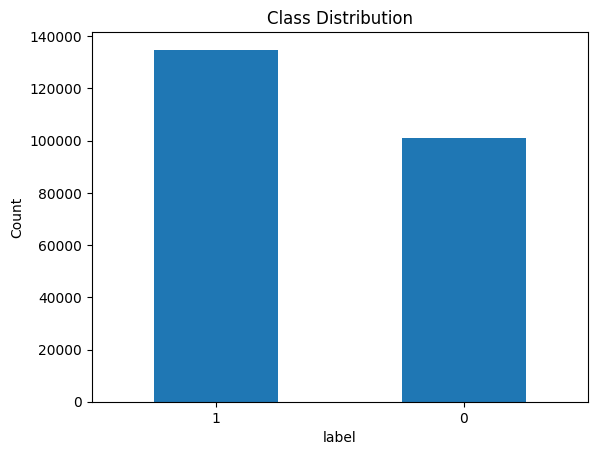

In [85]:

class_counts = df["label"].value_counts()
class_percent = df["label"].value_counts(normalize=True) * 100

class_df = pd.DataFrame({
    "Count": class_counts,
    "Percentage (%)": class_percent.round(2)
})

display(class_df)

# Bar plot
class_counts.plot(kind="bar", title="Class Distribution", rot=0)
plt.ylabel("Count")
plt.show()

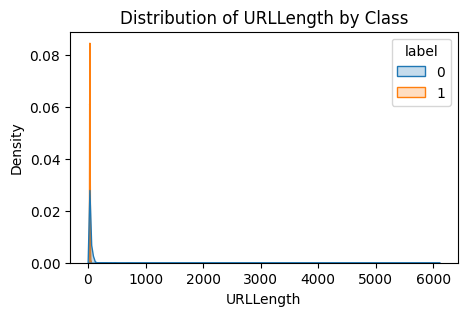

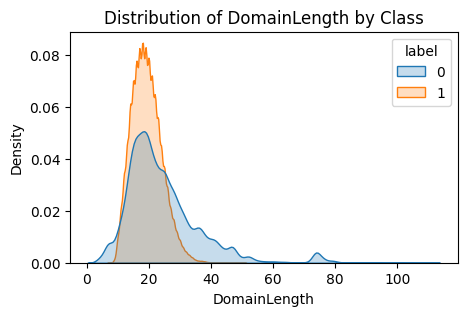

/var/folders/dt/sbksqfjn2tv1cd5j97xd1tnw0000gn/T/ipykernel_31239/2453156728.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)


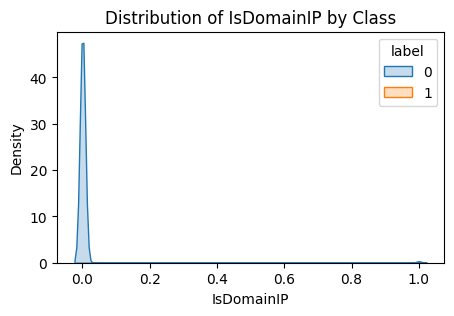

/var/folders/dt/sbksqfjn2tv1cd5j97xd1tnw0000gn/T/ipykernel_31239/2453156728.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)


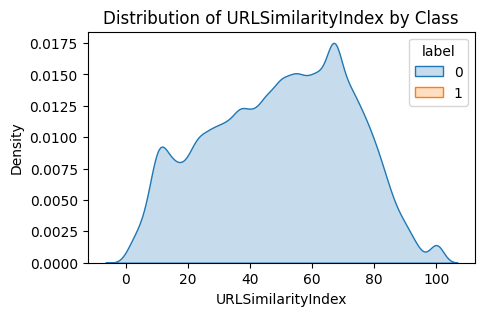

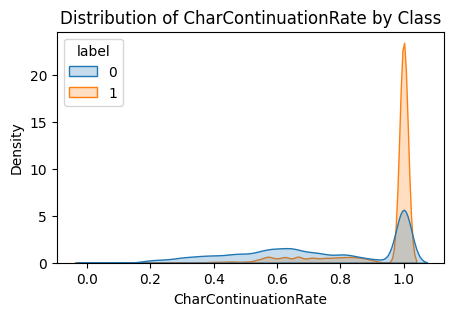

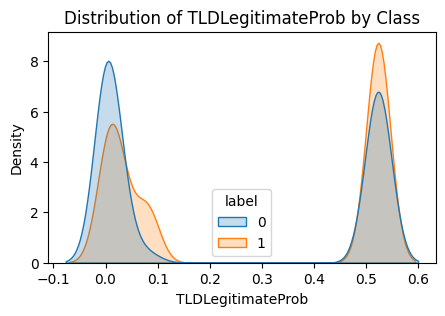

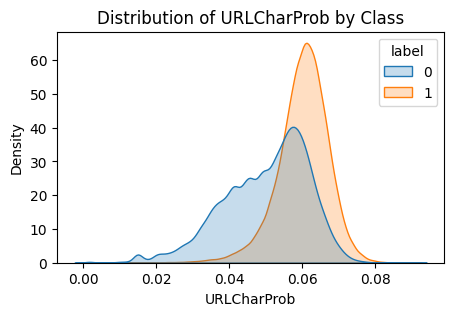

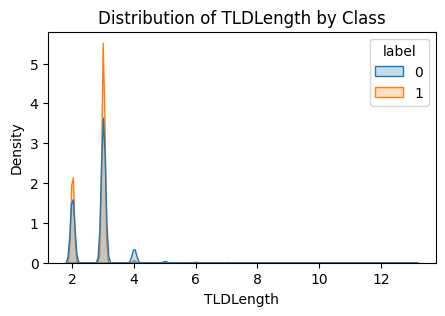

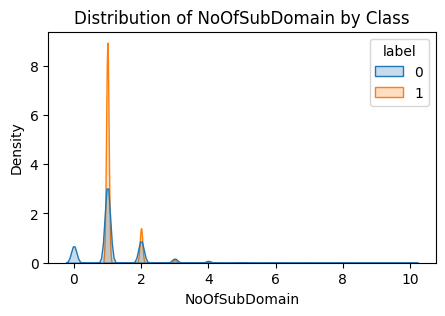

/var/folders/dt/sbksqfjn2tv1cd5j97xd1tnw0000gn/T/ipykernel_31239/2453156728.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)


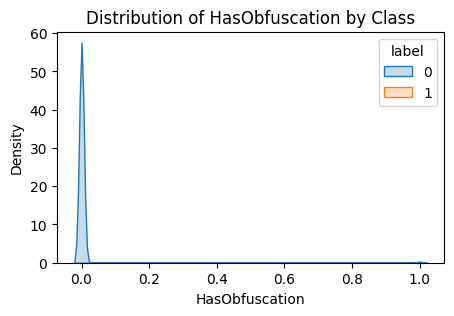

/var/folders/dt/sbksqfjn2tv1cd5j97xd1tnw0000gn/T/ipykernel_31239/2453156728.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)


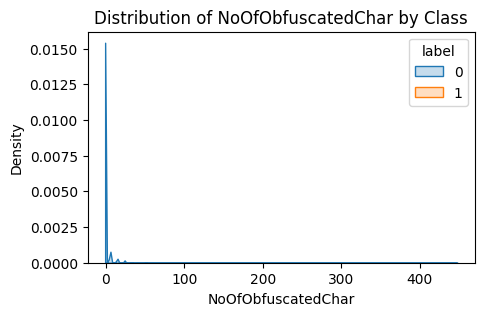

/var/folders/dt/sbksqfjn2tv1cd5j97xd1tnw0000gn/T/ipykernel_31239/2453156728.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)


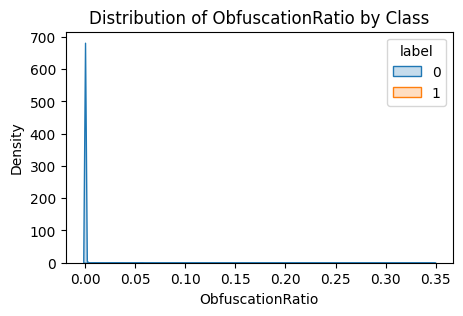

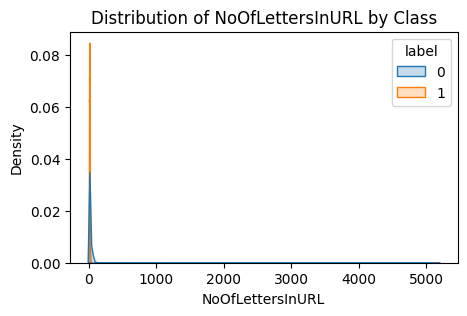

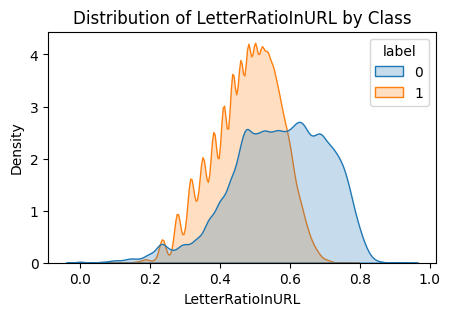

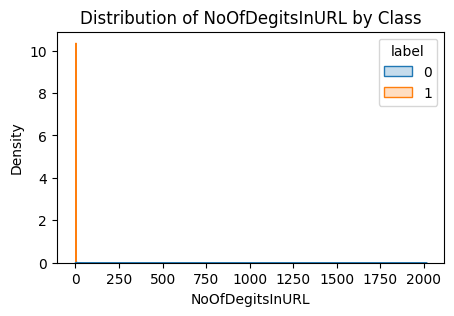

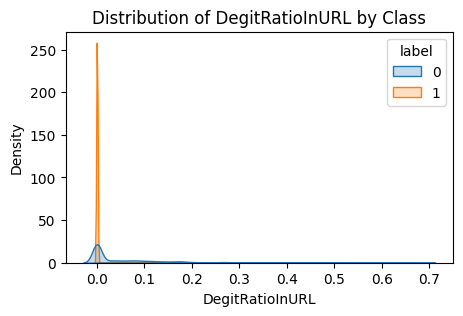

/var/folders/dt/sbksqfjn2tv1cd5j97xd1tnw0000gn/T/ipykernel_31239/2453156728.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)


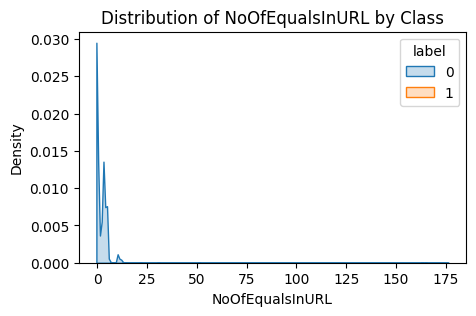

/var/folders/dt/sbksqfjn2tv1cd5j97xd1tnw0000gn/T/ipykernel_31239/2453156728.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)


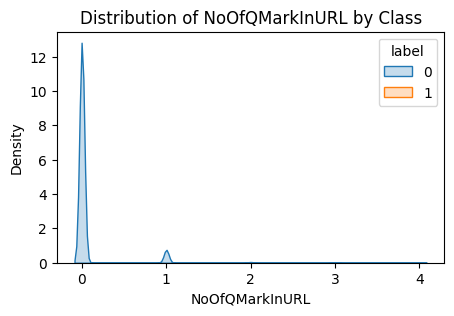

/var/folders/dt/sbksqfjn2tv1cd5j97xd1tnw0000gn/T/ipykernel_31239/2453156728.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)


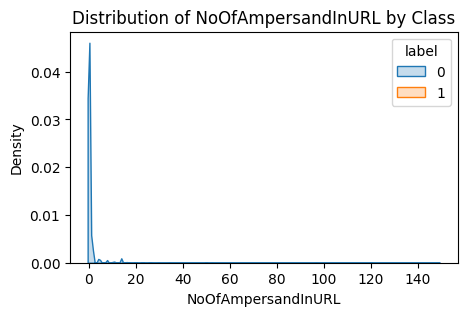

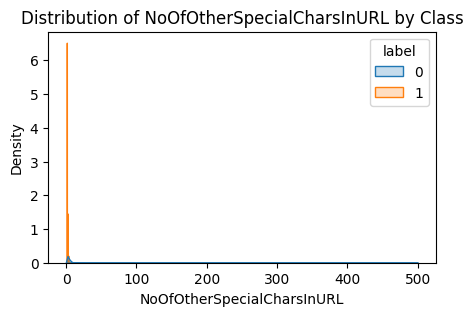

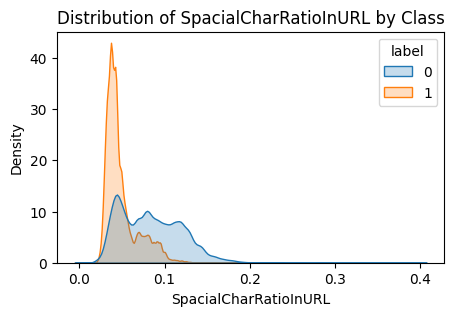

/var/folders/dt/sbksqfjn2tv1cd5j97xd1tnw0000gn/T/ipykernel_31239/2453156728.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)


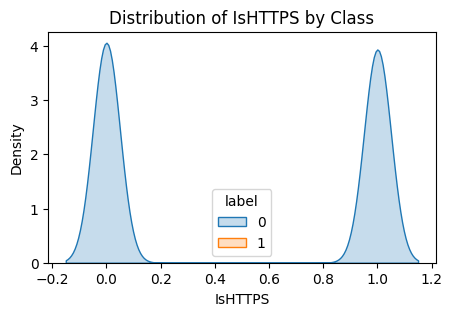

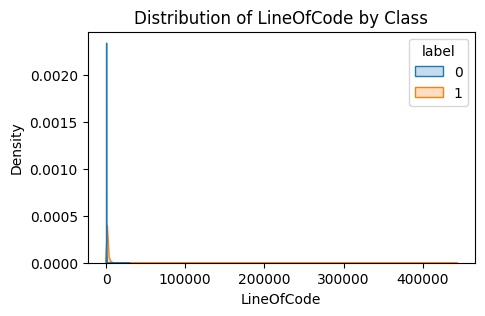

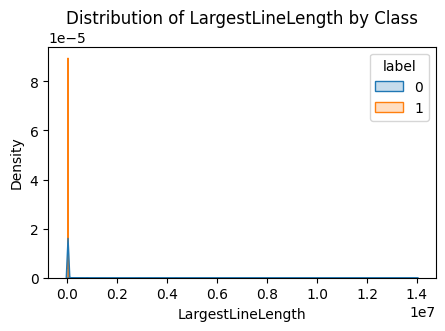

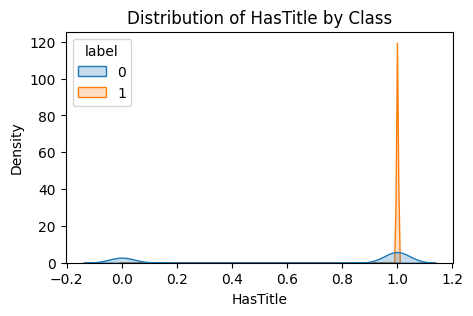

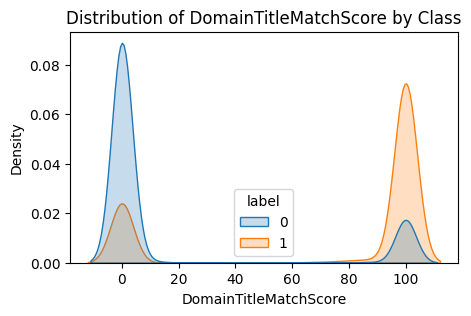

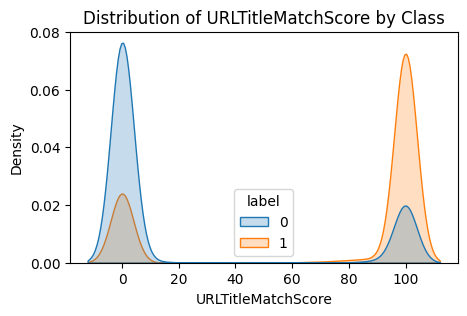

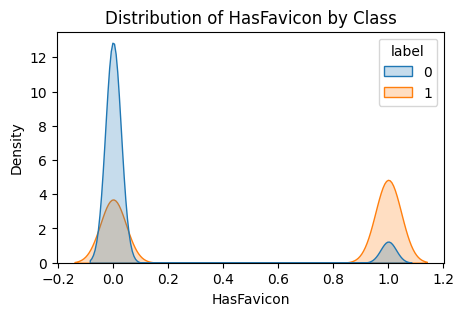

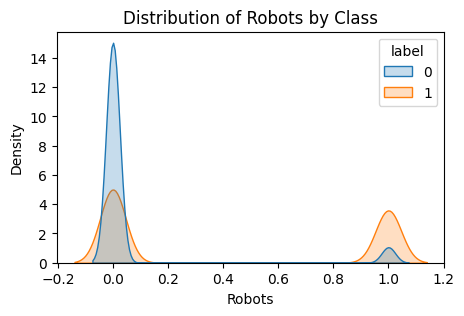

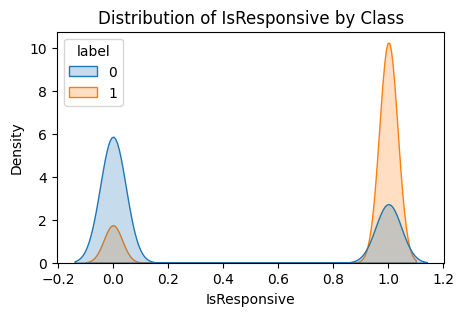

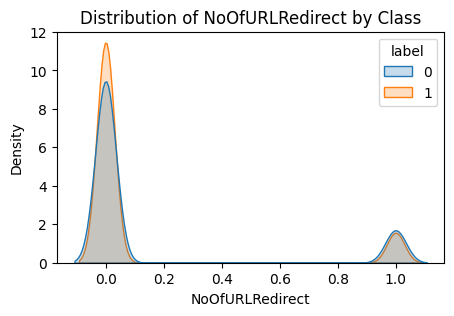

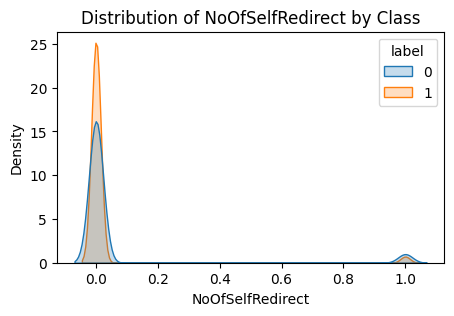

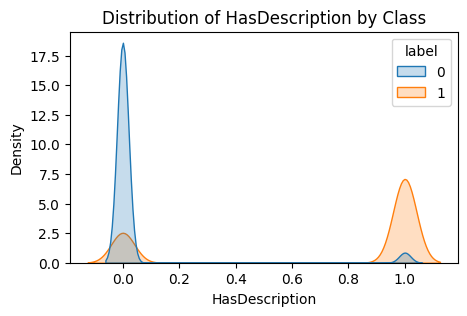

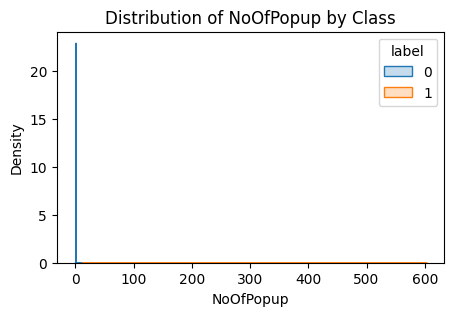

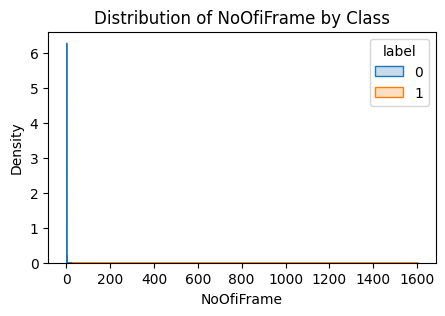

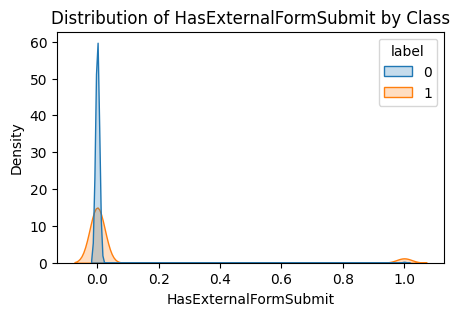

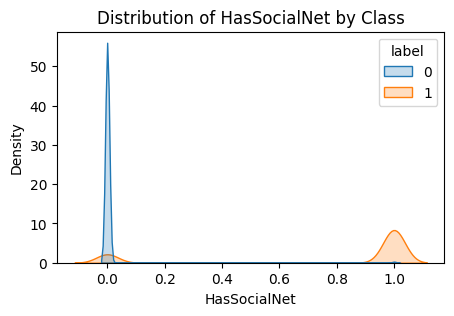

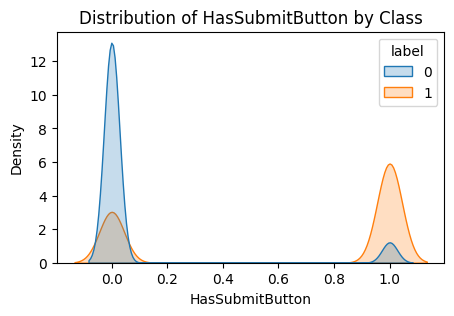

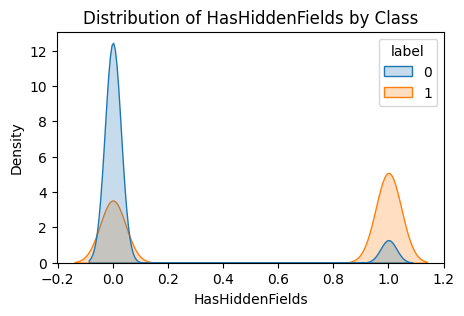

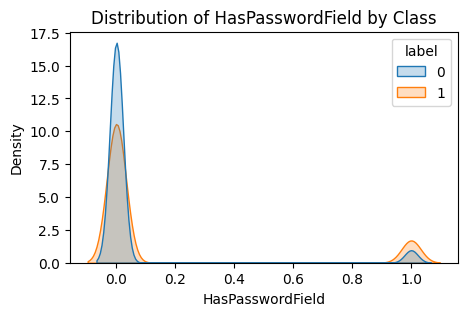

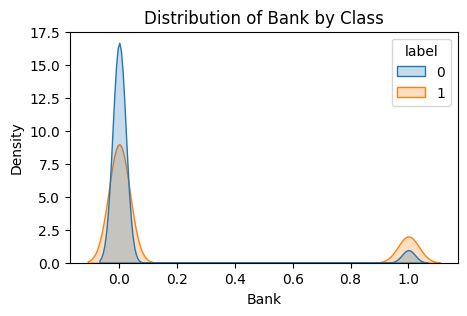

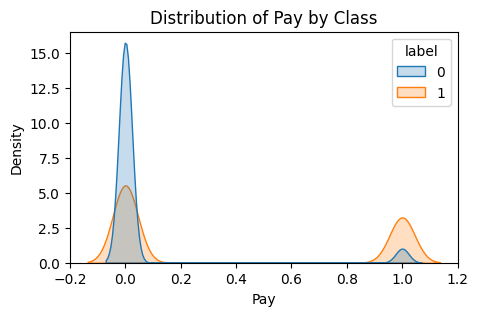

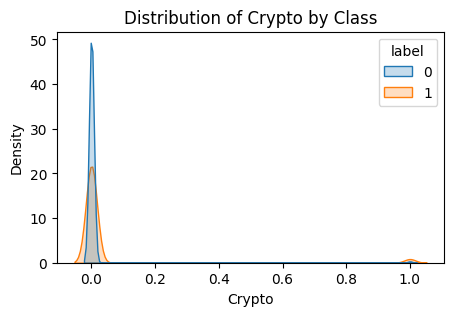

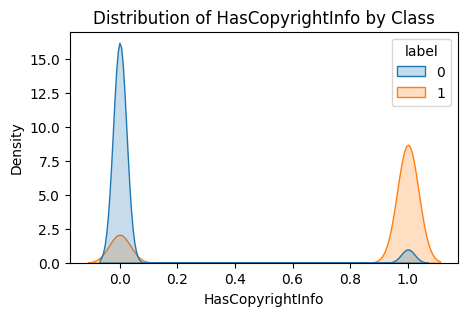

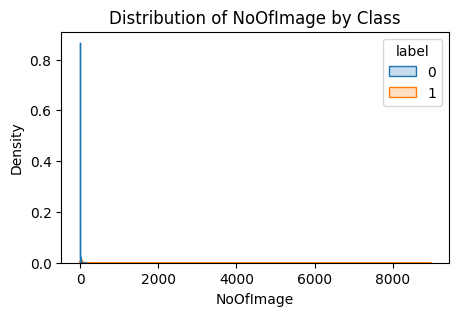

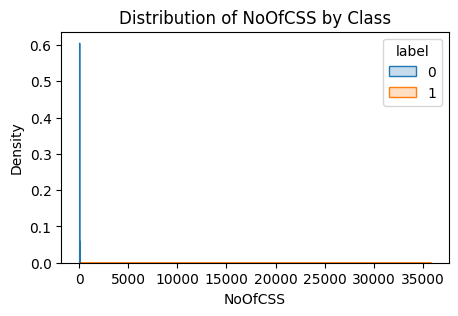

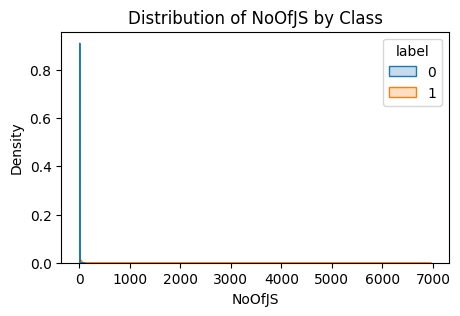

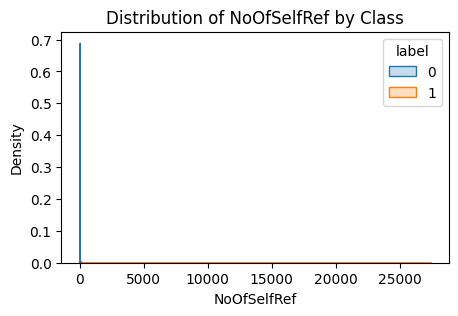

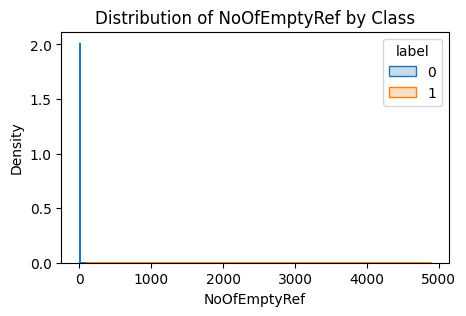

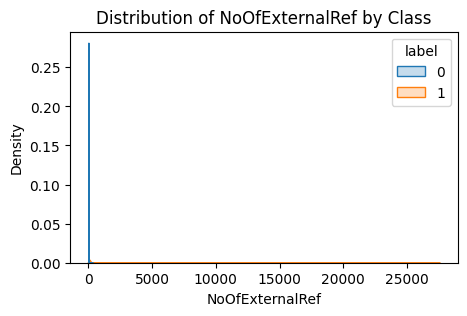

/var/folders/dt/sbksqfjn2tv1cd5j97xd1tnw0000gn/T/ipykernel_31239/2453156728.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)


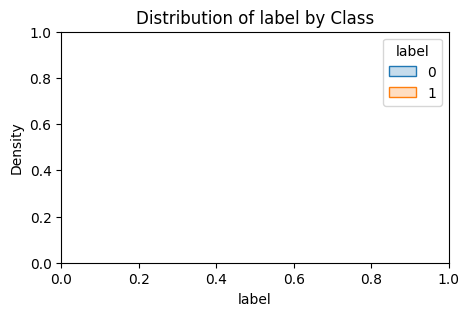

In [86]:

for col in numeric_columns:
    plt.figure(figsize=(5,3))
    sns.kdeplot(data=df, x=col, hue="label", fill=True, common_norm=False)
    plt.title(f"Distribution of {col} by Class")
    plt.show()

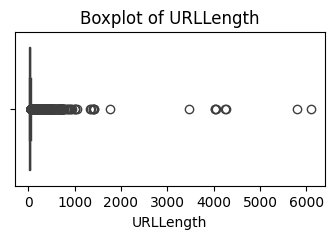

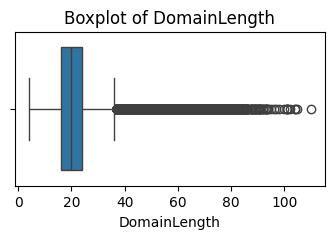

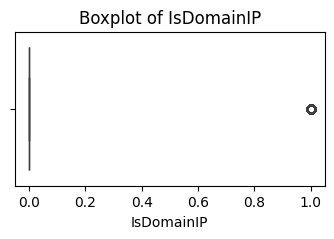

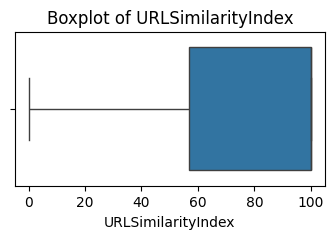

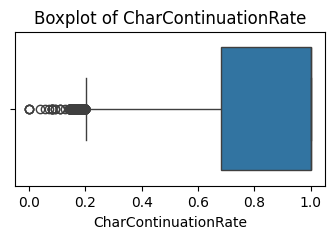

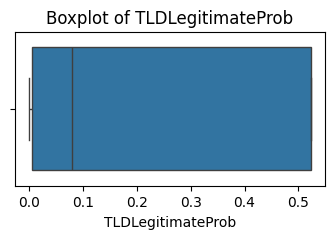

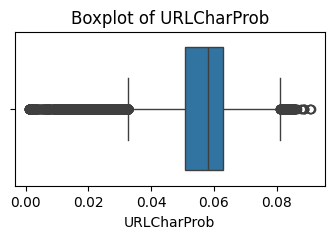

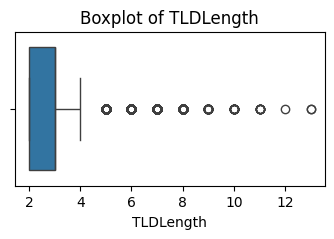

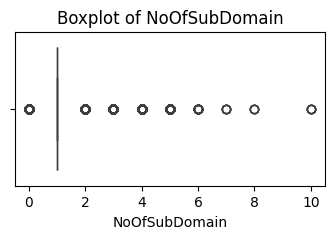

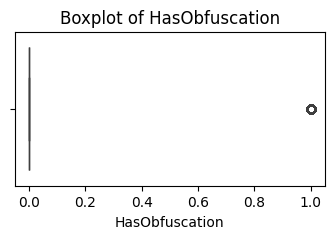

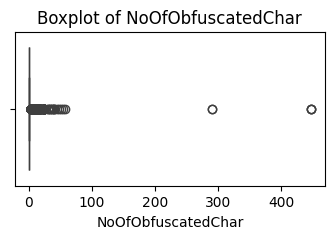

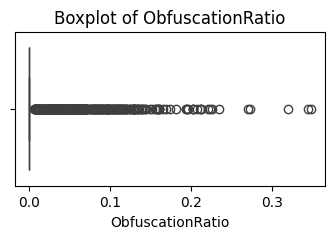

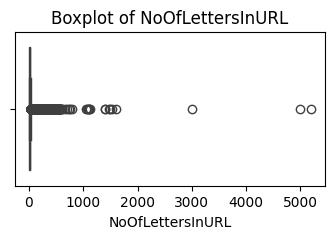

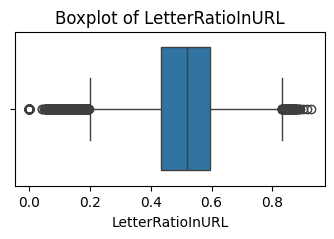

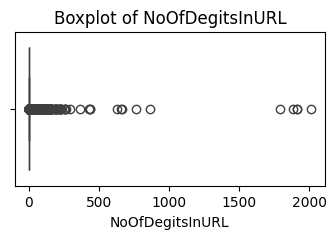

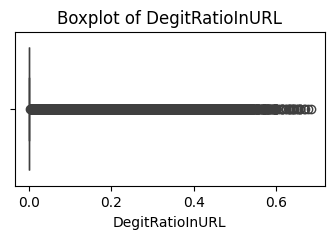

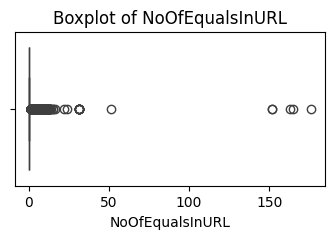

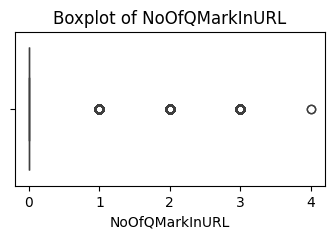

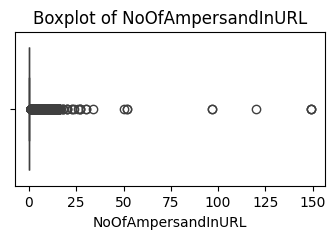

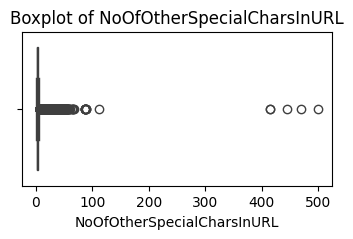

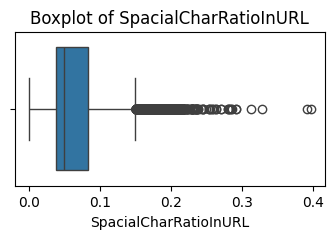

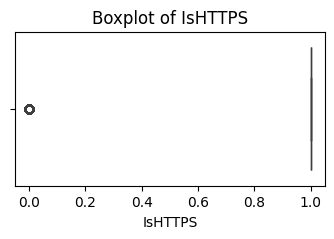

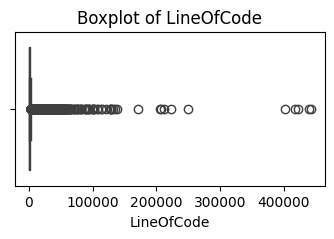

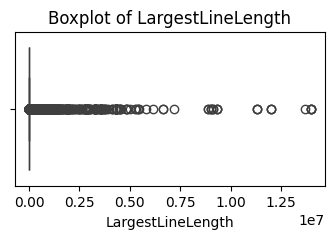

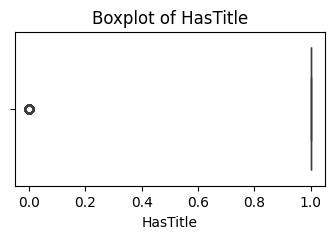

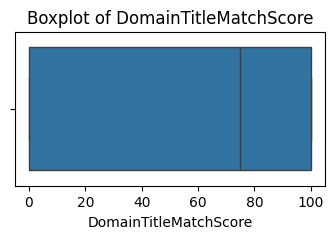

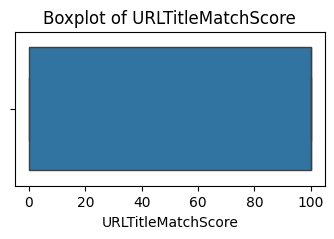

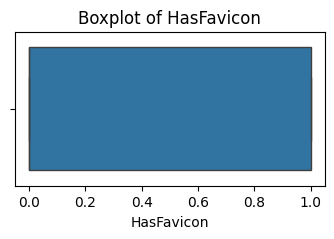

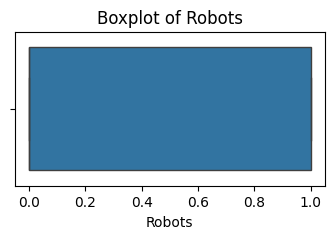

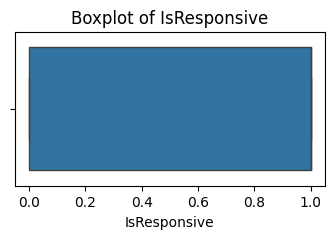

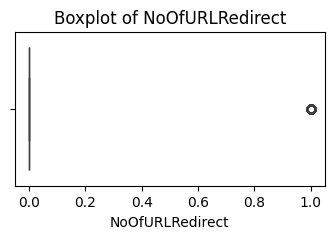

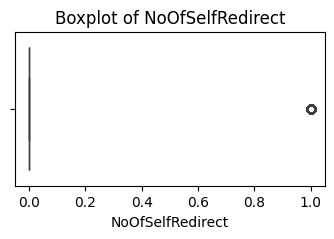

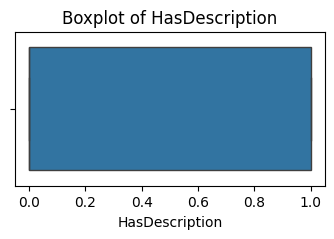

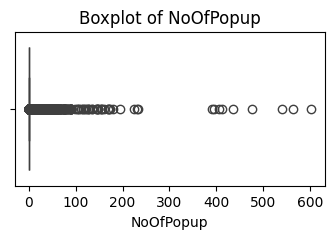

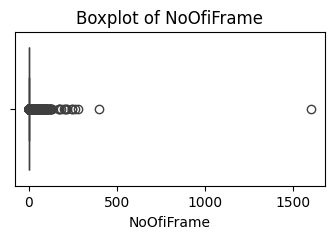

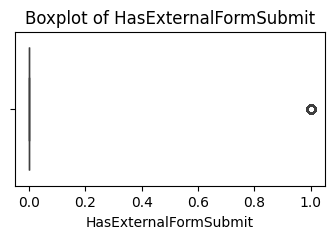

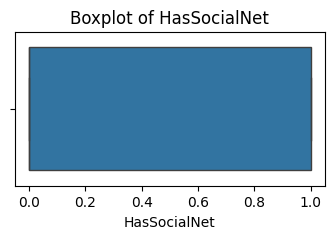

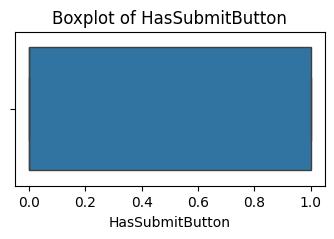

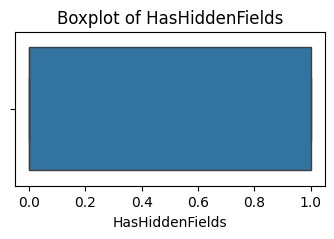

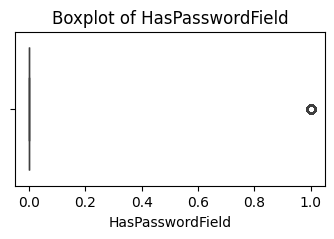

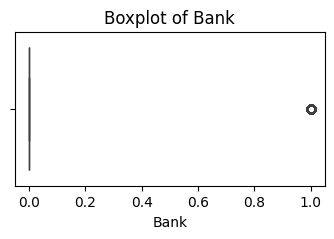

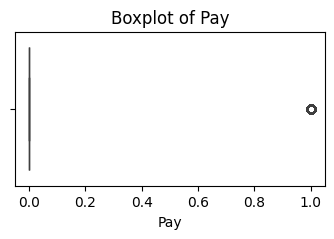

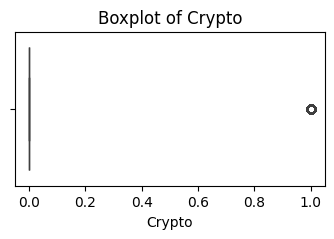

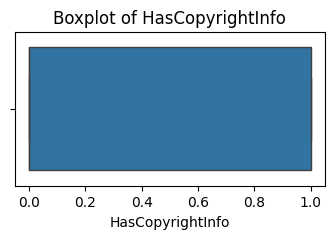

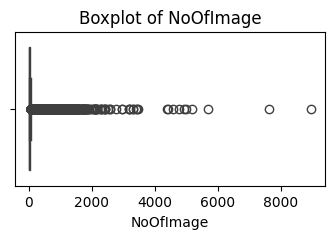

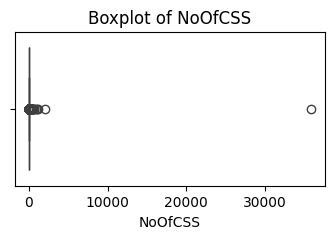

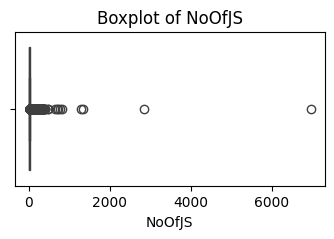

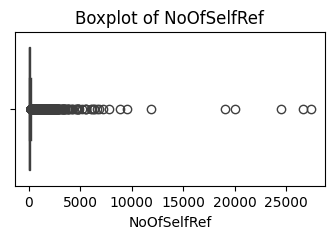

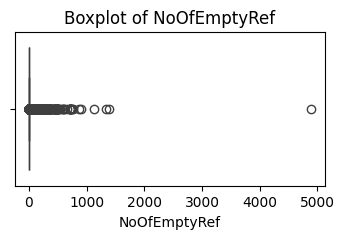

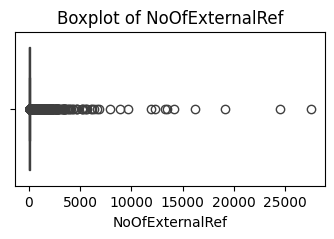

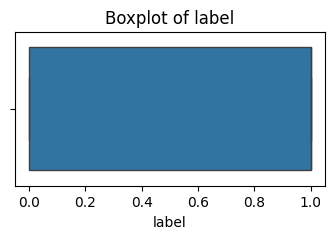

In [87]:
for col in numeric_columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

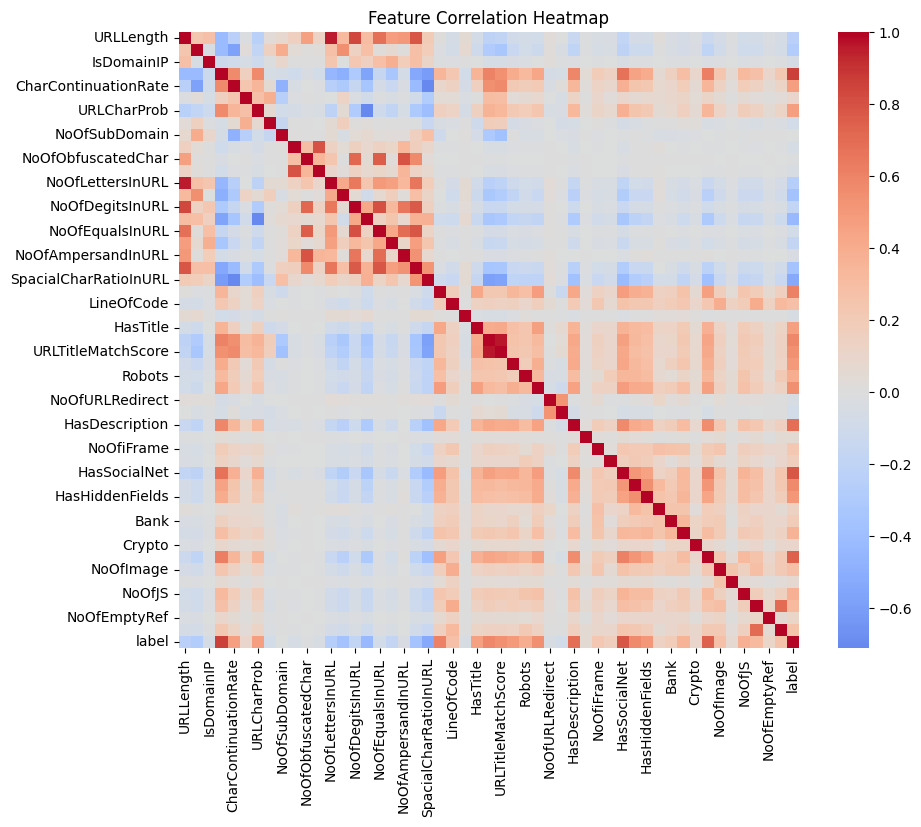

In [88]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [89]:
target_corr = corr["label"].sort_values(ascending=False)

display(target_corr)

label                         1.000000
URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
Robots                        0.392620
NoOfJS                        0.373500
Pay                           0.359747
NoOfSelfRef                   0.316211
NoOfImage                     0.274658
LineOfCode                    0.272257
NoOfExternalRef               0.258627
NoOfiFrame                    0.225822
Bank                          0.188959
HasExternalFormSubmit         0.167574
HasPasswordField         

### Exploratory Data Analysis – Observations

1. **Class Distribution**
   - The target variable shows a reasonably balanced distribution between the classes, with no extreme class imbalance.
   - This indicates that accuracy, precision, recall, and F1-score are all meaningful evaluation metrics for this problem.

2. **Feature Distributions by Class**
   - Several numerical features show noticeable differences in their distributions across the two classes.
   - Some features exhibit partial separation between classes, indicating moderate discriminative power.
   - Other features show overlapping distributions, suggesting that they may not be individually strong predictors but could contribute when combined with other features.

3. **Outliers**
   - Boxplots reveal the presence of outliers in certain features.
   - These outliers may affect distance-based and linear models such as k-Nearest Neighbors and Logistic Regression.
   - Tree-based models are expected to be more robust to such outliers.

4. **Correlation Analysis**
   - Correlation analysis shows that some features have a positive or negative relationship with the target variable.
   - A few feature pairs exhibit high correlation among themselves, indicating potential multicollinearity.

5. **Modeling Implications**
   - Due to overlapping feature distributions and multicollinearity, non-linear and ensemble models such as Random Forest and XGBoost are expected to perform better.
   - Scaling will be important for models such as Logistic Regression, kNN, and Naive Bayes.

Overall, the EDA suggests that the dataset is suitable for supervised classification and motivates the use of multiple machine learning models for comparative evaluation.

### Step 3: Data Preprocesing , Scaling and feature engineering 

In [90]:
df = df.drop_duplicates()

print("Dataset shape after removing duplicates:", df.shape)
print("Missing values after cleaning:", df.isnull().sum().sum())
print("Duplicate rows after cleaning:", df.duplicated().sum())

Dataset shape after removing duplicates: (235795, 56)
Missing values after cleaning: 0
Duplicate rows after cleaning: 0


In [91]:
text_identifier_cols = [
    "FILENAME",
    "URL",
    "Domain",
    "TLD",
    "Title"
]

df_cleaned = df.drop(columns=text_identifier_cols)

print("Dropped columns:", text_identifier_cols)
print("Remaining shape:", df_cleaned.shape)

Dropped columns: ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']
Remaining shape: (235795, 51)


In [92]:

X = df_cleaned.drop(columns=["label"])
y = df_cleaned["label"]

print("Feature matrix shape (X):", X.shape)
print("Target vector shape (y):", y.shape)

Feature matrix shape (X): (235795, 50)
Target vector shape (y): (235795,)


In [93]:
non_numeric_cols = X.select_dtypes(exclude=["int64", "float64"]).columns.tolist()

print("Non-numeric columns in X:", non_numeric_cols)
print("Total numeric features:", X.shape[1])

Non-numeric columns in X: []
Total numeric features: 50


In [94]:
X = X.select_dtypes(include=["int64", "float64"])

print("Final feature set shape:", X.shape)

Final feature set shape: (235795, 50)


In [153]:

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (165056, 50) Test: (35370, 50)


In [154]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # fit only on train ✅
X_test_scaled  = scaler.transform(X_test)        # transform test ✅

print("Scaled train:", X_train_scaled.shape)
print("Scaled test :", X_test_scaled.shape)

Scaled train: (165056, 50)
Scaled test : (35370, 50)


In [ ]:
import os


test_download_df = X_test.copy()
test_download_df["label"] = y_test.values  # include label so user can validate

test_path = "../data/test_data.csv"
test_download_df.to_csv(test_path, index=False)

print("Saved test data for download:", test_path)

Saved test data for download: ../data/test_data.csv


In [156]:
import joblib
import os


joblib.dump(scaler, "../data/artifacts/standard_scaler.joblib")
print("Saved scaler: ../data/artifacts/standard_scaler.joblib")

Saved scaler: ../data/artifacts/standard_scaler.joblib


### Step 4 - Model creaton

In [157]:
results_df = pd.DataFrame(columns=["Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"])
display(results_df)

,Model,Accuracy,AUC,Precision,Recall,F1,MCC


In [226]:
def validation_check(model, name, Xtr, ytr, Xv, yv, Xt, yt):
    print(f"\n{name}")
    print("Train Accuracy      :", accuracy_score(ytr, model.predict(Xtr)))
    print("Validation Accuracy :", accuracy_score(yv, model.predict(Xv)))
    print("Test Accuracy       :", accuracy_score(yt, model.predict(Xt)))

1. Logistic Regression

What it is
	•	A linear classification model
	•	Models the probability of a class using the sigmoid function

Why we use it
	•	Simple and interpretable baseline
	•	Works well when classes are linearly separable

Important assumptions
	•	Features are on a similar scale → scaling required
	•	Sensitive to outliers

Data used



In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix, classification_report
)
import pandas as pd
import numpy as np
import joblib
import os

In [160]:
log_reg = LogisticRegression(
    C=0.1,          # stronger regularization
    penalty="l2",
    solver="lbfgs",
    max_iter=2000,
    random_state=42
)

In [161]:
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [162]:
y_pred = log_reg.predict(X_test_scaled)


In [163]:
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [164]:
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("=== Logistic Regression Metrics ===")
print(f"Accuracy  : {acc:.4f}")
print(f"AUC Score : {auc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"MCC Score : {mcc:.4f}")

=== Logistic Regression Metrics ===
Accuracy  : 0.9999
AUC Score : 1.0000
Precision : 0.9998
Recall    : 1.0000
F1 Score  : 0.9999
MCC Score : 0.9997


In [165]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[15137     5]
 [    0 20228]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15142
           1       1.00      1.00      1.00     20228

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



In [166]:
if "results_df" not in globals():
    results_df = pd.DataFrame(columns=[
        "Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"
    ])

results_df.loc[len(results_df)] = [
    "Logistic Regression", acc, auc, prec, rec, f1, mcc
]

display(results_df)

,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.999859,1.0,0.999753,1.0,0.999876,0.999711


In [167]:
os.makedirs("../data/artifacts", exist_ok=True)
joblib.dump(log_reg, "../data/artifacts/logistic_regression_model.joblib")
print("\nSaved model to: ../data/artifacts/logistic_regression_model.joblib")


Saved model to: ../data/artifacts/logistic_regression_model.joblib


2. Decision Tree Classifier

What it is
	•	A rule-based, non-linear model
	•	Splits data using conditions like:
feature ≤ threshold

Why we use it
	•	Captures non-linear relationships
	•	Easy to interpret
	•	No need for feature scaling

Strengths
	•	Handles outliers well
	•	Works with mixed feature types

Weakness
	•	Prone to overfitting

Data used

✅ X_train, X_test (unscaled)

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix, classification_report
)
import pandas as pd
import joblib
import os

In [170]:
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=25,
    random_state=42
)

In [171]:
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,50
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [172]:
y_pred = dt_model.predict(X_test)

In [173]:
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

In [174]:
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("=== Decision Tree Metrics ===")
print(f"Accuracy  : {acc:.4f}")
print(f"AUC Score : {auc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"MCC Score : {mcc:.4f}")

=== Decision Tree Metrics ===
Accuracy  : 0.9999
AUC Score : 1.0000
Precision : 1.0000
Recall    : 0.9999
F1 Score  : 1.0000
MCC Score : 0.9999


In [175]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[15142     0]
 [    2 20226]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15142
           1       1.00      1.00      1.00     20228

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



In [176]:
if "results_df" not in globals():
    results_df = pd.DataFrame(columns=[
        "Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"
    ])

results_df.loc[len(results_df)] = [
    "Decision Tree", acc, auc, prec, rec, f1, mcc
]

display(results_df)

,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.999859,1.0,0.999753,1.000000,0.999876,0.999711
1,Decision Tree,0.999943,1.0,1.000000,0.999901,0.999951,0.999885


In [ ]:
joblib.dump(dt_model, "../data/artifacts/decision_tree_model.joblib")
print("\nSaved model to: ../data/artifacts/decision_tree_model.joblib")


Saved model to: ../data/artifacts/decision_tree_model.joblib


3. K-Nearest Neighbors (kNN)

What it is
	•	A distance-based classifier
	•	Predicts class based on majority vote of k nearest points

Why we use it
	•	Non-parametric
	•	Simple and intuitive

Important assumptions
	•	Distance matters → scaling mandatory
	•	Computationally expensive for large datasets

Data used

✅ X_train_scaled, X_test_scaled

In [178]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix, classification_report
)
import pandas as pd
import joblib
import os

In [179]:
knn_model = KNeighborsClassifier(
    n_neighbors=15,
    weights="distance",
    metric="minkowski"
)

In [180]:
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,15
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [181]:
y_pred = knn_model.predict(X_test_scaled)


In [182]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

In [183]:
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("=== kNN Metrics ===")
print(f"Accuracy  : {acc:.4f}")
print(f"AUC Score : {auc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"MCC Score : {mcc:.4f}")

=== kNN Metrics ===
Accuracy  : 0.9984
AUC Score : 0.9996
Precision : 0.9977
Recall    : 0.9994
F1 Score  : 0.9986
MCC Score : 0.9967


In [184]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[15096    46]
 [   12 20216]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15142
           1       1.00      1.00      1.00     20228

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



In [185]:
if "results_df" not in globals():
    results_df = pd.DataFrame(columns=[
        "Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"
    ])

results_df.loc[len(results_df)] = [
    "KNN (k=5)", acc, auc, prec, rec, f1, mcc
]

display(results_df)

,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.999859,1.000000,0.999753,1.000000,0.999876,0.999711
1,Decision Tree,0.999943,1.000000,1.000000,0.999901,0.999951,0.999885
2,KNN (k=5),0.998360,0.999613,0.997730,0.999407,0.998568,0.996652


In [ ]:
joblib.dump(knn_model, "../data/artifacts/knn_model.joblib")
print("\nSaved model to: ../data/artifacts/knn_model.joblib")


Saved model to: ../data/artifacts/knn_model.joblib


4. Naive Bayes Classifier (Gaussian)

What it is
	•	Probabilistic classifier based on Bayes’ theorem

P(y|x) \propto P(x|y)P(y)

Why Gaussian NB
	•	Features are continuous
	•	Assumes features follow a normal distribution

Key assumption
	•	Features are conditionally independent (naive assumption)

Strengths
	•	Very fast
	•	Works well for large datasets

Data used

✅ X_train_scaled, X_test_scaled

In [187]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix, classification_report
)
import pandas as pd
import joblib
import os

In [189]:
gnb_model = GaussianNB(var_smoothing=1e-8)

In [190]:
gnb_model.fit(X_train_scaled, y_train)

,priors,None
,var_smoothing,1e-08


In [191]:
y_pred = gnb_model.predict(X_test_scaled)

In [192]:
y_pred_proba = gnb_model.predict_proba(X_test_scaled)[:, 1]

In [193]:
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("=== Gaussian Naive Bayes Metrics ===")
print(f"Accuracy  : {acc:.4f}")
print(f"AUC Score : {auc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"MCC Score : {mcc:.4f}")

=== Gaussian Naive Bayes Metrics ===
Accuracy  : 0.9996
AUC Score : 0.9998
Precision : 0.9998
Recall    : 0.9995
F1 Score  : 0.9996
MCC Score : 0.9991


In [195]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[15137     5]
 [   10 20218]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15142
           1       1.00      1.00      1.00     20228

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



In [196]:
if "results_df" not in globals():
    results_df = pd.DataFrame(columns=[
        "Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"
    ])

results_df.loc[len(results_df)] = [
    "Gaussian Naive Bayes", acc, auc, prec, rec, f1, mcc
]

display(results_df)

,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.999859,1.000000,0.999753,1.000000,0.999876,0.999711
1,Decision Tree,0.999943,1.000000,1.000000,0.999901,0.999951,0.999885
2,KNN (k=5),0.998360,0.999613,0.997730,0.999407,0.998568,0.996652
3,Gaussian Naive Bayes,0.999576,0.999835,0.999753,0.999506,0.999629,0.999134


In [ ]:
joblib.dump(gnb_model, "../data/artifacts/gaussian_nb_model.joblib")
print("\nSaved model to: ../data/artifacts/gaussian_nb_model.joblib")


Saved model to: ../data/artifacts/gaussian_nb_model.joblib


5. Ensemble Model – Random Forest

What it is
	•	Ensemble of multiple decision trees
	•	Uses bagging (bootstrap aggregation)

Why we use it
	•	Reduces overfitting
	•	Strong performance on tabular data

Strengths
	•	Handles non-linearities
	•	Robust to noise and outliers

Data used

✅ X_train, X_test (unscaled)


In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix, classification_report
)
import pandas as pd
import joblib
import os

In [199]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=50,
    min_samples_leaf=25,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

In [200]:
rf_model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,12
,min_samples_split,50
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [201]:
y_pred = rf_model.predict(X_test)

In [202]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [203]:
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("=== Random Forest Metrics ===")
print(f"Accuracy  : {acc:.4f}")
print(f"AUC Score : {auc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"MCC Score : {mcc:.4f}")

=== Random Forest Metrics ===
Accuracy  : 0.9999
AUC Score : 1.0000
Precision : 0.9999
Recall    : 1.0000
F1 Score  : 1.0000
MCC Score : 0.9999


In [204]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[15140     2]
 [    0 20228]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15142
           1       1.00      1.00      1.00     20228

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



In [205]:
if "results_df" not in globals():
    results_df = pd.DataFrame(columns=[
        "Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"
    ])

results_df.loc[len(results_df)] = [
    "Random Forest", acc, auc, prec, rec, f1, mcc
]

display(results_df)

,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.999859,1.000000,0.999753,1.000000,0.999876,0.999711
1,Decision Tree,0.999943,1.000000,1.000000,0.999901,0.999951,0.999885
2,KNN (k=5),0.998360,0.999613,0.997730,0.999407,0.998568,0.996652
3,Gaussian Naive Bayes,0.999576,0.999835,0.999753,0.999506,0.999629,0.999134
4,Random Forest,0.999943,1.000000,0.999901,1.000000,0.999951,0.999885


In [ ]:
joblib.dump(rf_model, "../data/artifacts/random_forest_model.joblib")
print("\nSaved model to: ../data/artifacts/random_forest_model.joblib")


Saved model to: ../data/artifacts/random_forest_model.joblib


6. Ensemble Model – XGBoost

What it is
	•	Gradient boosting algorithm
	•	Trees are built sequentially to correct previous errors

Why we use it
	•	High predictive power
	•	Handles complex feature interactions

Strengths
	•	Regularization built-in
	•	Often best-performing model

Data used

✅ X_train, X_test (unscaled)


In [217]:
import xgboost as xgb
from xgboost.callback import EarlyStopping
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix, classification_report
)
import pandas as pd
import joblib
import os

In [218]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test, label=y_test)

In [219]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 6,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_alpha": 1.0,
    "reg_lambda": 1.0,
    "seed": 42
}

xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=400,
    evals=[(dval, "validation")],
    early_stopping_rounds=20,
    verbose_eval=False
)


In [223]:
y_pred_proba = xgb_model.predict(dtest)
y_pred = (y_pred_proba >= 0.5).astype(int)

In [224]:
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("=== XGBoost Metrics ===")
print(f"Accuracy  : {acc:.4f}")
print(f"AUC Score : {auc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"MCC Score : {mcc:.4f}")

=== XGBoost Metrics ===
Accuracy  : 1.0000
AUC Score : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000
MCC Score : 1.0000


In [225]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- 7) Append results to common table ---
if "results_df" not in globals():
    results_df = pd.DataFrame(columns=[
        "Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"
    ])

results_df.loc[len(results_df)] = [
    "XGBoost", acc, auc, prec, rec, f1, mcc
]

display(results_df)


Confusion Matrix:
[[15142     0]
 [    0 20228]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15142
           1       1.00      1.00      1.00     20228

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.999859,1.000000,0.999753,1.000000,0.999876,0.999711
1,Decision Tree,0.999943,1.000000,1.000000,0.999901,0.999951,0.999885
2,KNN (k=5),0.998360,0.999613,0.997730,0.999407,0.998568,0.996652
3,Gaussian Naive Bayes,0.999576,0.999835,0.999753,0.999506,0.999629,0.999134
4,Random Forest,0.999943,1.000000,0.999901,1.000000,0.999951,0.999885
5,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
joblib.dump(xgb_model, "../data/artifacts/xgboost_model.joblib")
print("\nSaved model to: ../data/artifacts/xgboost_model.joblib")


Saved model to: ../data/artifacts/xgboost_model.joblib
